# GEA1000 Tutorial 4
Done By: Joel Quek

## Open CSV as a Data Frame

In [2]:
trees <- read.csv("trees.csv", header=TRUE)

In [4]:
head(trees)

,tree_id,species_id,species_name,common_name,girth,height,age,geometry
,<dbl>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>
1,1999.001,1907,Xanthostemon chrysanthus,Golden Myrtle,0.6,6,18,POINT (103.744379 1.38631)
2,2009.013,1873,Syzygium zeylanicum,Gelam Tikus,0.4,6,8,POINT (103.823069 1.318688)
3,2008.003,1848,Sterculia parviflora,Kelumpang Burong,1.0,9,10,POINT (103.800919 1.429295)
4,2000.004,1907,Xanthostemon chrysanthus,Golden Myrtle,1.5,18,18,POINT (103.794618 1.332331)
5,1997.341,1857,Swietenia macrophylla,American Mahogany,2.5,12,18,POINT (103.928155 1.309291)
6,2005.016,1907,Xanthostemon chrysanthus,Golden Myrtle,1.2,15,15,POINT (103.844473 1.376908)


In [6]:
summary(trees)

    tree_id       species_id    species_name       common_name       
 Min.   :1997   Min.   :  170   Length:20000       Length:20000      
 1st Qu.:1997   1st Qu.: 1649   Class :character   Class :character  
 Median :2004   Median : 1813   Mode  :character   Mode  :character  
 Mean   :2003   Mean   : 2330                                        
 3rd Qu.:2007   3rd Qu.: 1907                                        
 Max.   :2018   Max.   :32842                                        
     girth            height           age           geometry        
 Min.   : 0.100   Min.   : 3.00   Min.   :  0.00   Length:20000      
 1st Qu.: 0.600   1st Qu.: 6.00   1st Qu.: 11.00   Class :character  
 Median : 0.800   Median : 9.00   Median : 14.00   Mode  :character  
 Mean   : 1.005   Mean   :10.05   Mean   : 13.95                     
 3rd Qu.: 1.300   3rd Qu.:12.00   3rd Qu.: 17.00                     
 Max.   :36.000   Max.   :24.00   Max.   :200.00                     

## Instantiate Variables

In [5]:
arr_prop = numeric(10000) # Number of Samples
pp_in_CI = logical(10000) # False 10000 times
sd_sd = sqrt((0.3*0.7)/200) 
left_end = 0.3-(1.96*sd_sd) 
right_end = 0.3+(1.96*sd_sd) 
prop_in = 0 

In [8]:
for (i in 1:10000) { 
    s = sample(trees[,"species_name"], 200) 
    number = sum(s == "Xanthostemon chrysanthus") 
    arr_prop[i] = (number/200) 
    if (arr_prop[i] >= left_end & arr_prop[i] <= right_end) { 
    prop_in = prop_in + 1 
} 
if (abs(arr_prop[i]-0.3) <= 1.96*sqrt((arr_prop[i]*(1-
    arr_prop[i]))/200)) { 
    pp_in_CI[i] = TRUE 
    } 
} 

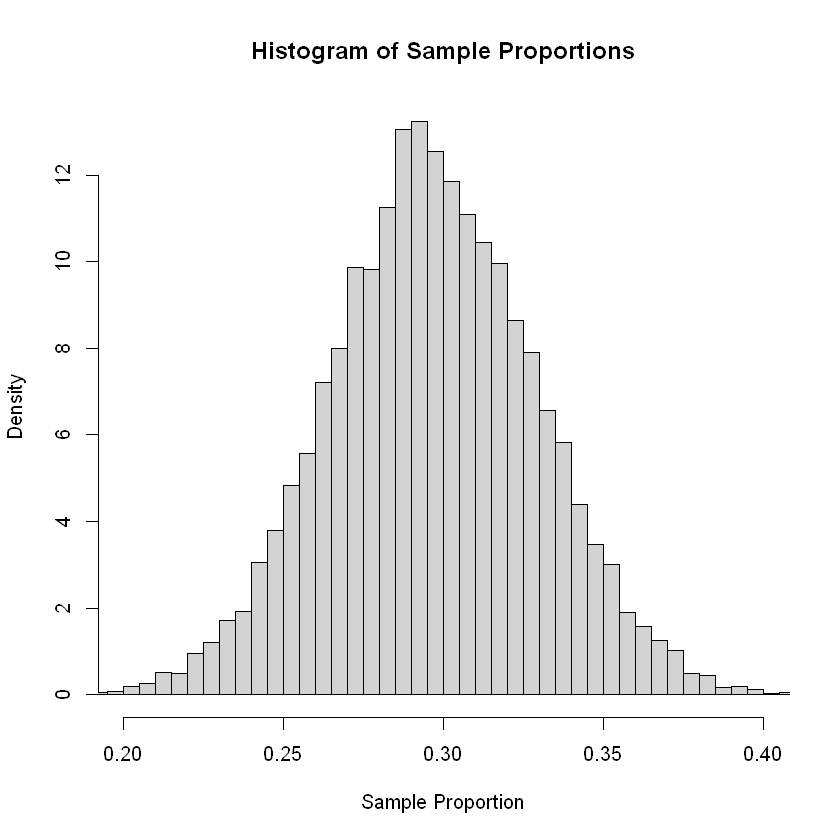

In [9]:
hist(arr_prop,  
main = "Histogram of Sample Proportions", 
xlab = "Sample Proportion",  
xlim = c(0.2, 0.4),  
breaks = seq(min(arr_prop), max(arr_prop), length.out = 
((max(arr_prop)-min(arr_prop))*200)+1),  
freq=FALSE) 